# TSNE vs PCA

How about compare how well PCA and TSNE differentiate basic ("Type 1") types of pokemons.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Loading dataset.

In [2]:
df = pd.read_csv('../input/Pokemon.csv').drop('Type 2', axis=1)

Indexing different types with new column "Type1Id".

In [3]:
df['Type1Id'] = df['Type 1'].rank(method='dense').astype(int)
df.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type1Id
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,10
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,10
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,10
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False,10
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,7


In [4]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'Legendary']
targets  = ['Type1Id']

Normalizing dataset with standard scaler. Mean of transformed features will be close to zero, and standard deviation also very close to 1.

In [5]:
df_norm = df.copy()
df_norm[features] = StandardScaler().fit(df[features]).transform(df[features])

Learning TSNE with 2 components and PCA with default number.

In [6]:
X_tsne = TSNE(learning_rate=500, n_components=2).fit_transform(df_norm[features])
X_pca = PCA().fit_transform(df_norm[features])

Let's plot how pairs of top 5 types are divided in tsne 2D layout. Not very succesfull.

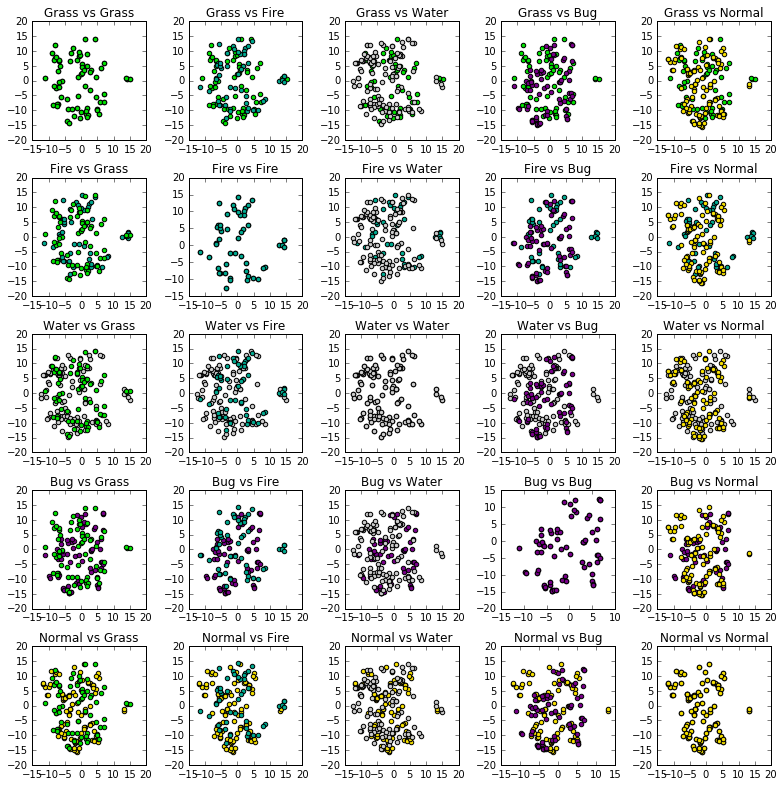

In [7]:
fig = figure(figsize=(11, 11))

cmap = plt.get_cmap('nipy_spectral')
types1 = df['Type 1'].unique()
type1_ids = df['Type1Id'].unique()
num_types1 = len(types1)

rows, cols = 5, 5
num = 1
for row, t1_id, t1 in zip(range(rows), type1_ids, types1):
    for col, t2_id, t2 in zip(range(cols), type1_ids, types1):
        subplot(rows,cols,num)
        X_i = X_tsne[np.where(df['Type1Id'] == t1_id)[0]]
        X_j = X_tsne[np.where(df['Type1Id'] == t2_id)[0]]
        scatter(X_i[:, 0], X_i[:, 1], c=cmap(t1_id / num_types1))
        scatter(X_j[:, 0], X_j[:, 1], c=cmap(t2_id / num_types1))
        title(str(t1) + ' vs ' + str(t2))
        num += 1
fig.tight_layout()

All other pairs of types aren't devided either. Nor by TSNE and nor by PCA.

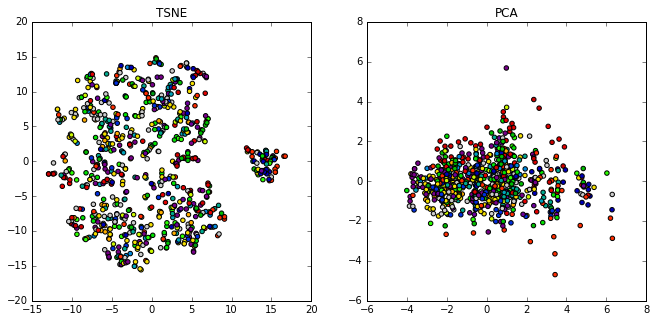

In [8]:
figure(figsize=(11, 5))
cmap = plt.get_cmap('nipy_spectral')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(df['Type1Id'] / num_types1))
title('TSNE')
subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(df['Type1Id'] / num_types1))
title('PCA');

There is a cluster of pokemons in TSNE layout that stands out. Let us plot "Legendary" variable.

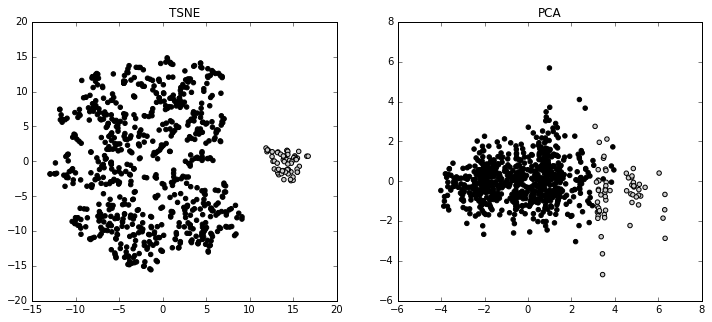

In [9]:
figure(figsize=(12, 5))
cmap = plt.get_cmap('nipy_spectral')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(df['Legendary'] * 1.))
title('TSNE')
subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(df['Legendary'] * 1.));
title('PCA');

TSNE better differentiates legendary and non legendary pokemons. As bigger plot shows, we ideally predict "legendary" property.

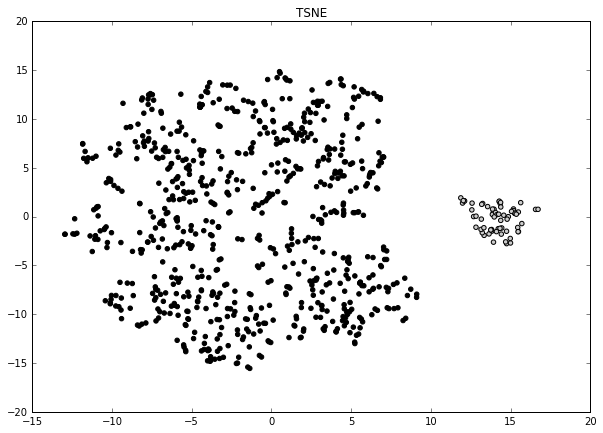

In [10]:
figure(figsize=(10, 7))
cmap = plt.get_cmap('nipy_spectral')

scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(df['Legendary'] * 1.))
title('TSNE');

## Non legendary pokemons

As out tsne layout strongly depends on whether there are legendary pokemons in a dataset, let's only consider non legendary pokemons.

In [11]:
df = df[~df['Legendary']]

df_norm = df.copy()
df_norm[features] = StandardScaler().fit(df[features]).transform(df[features])

X_tsne = TSNE(learning_rate=600, n_components=2).fit_transform(df_norm[features])
X_pca = PCA().fit_transform(df_norm[features])

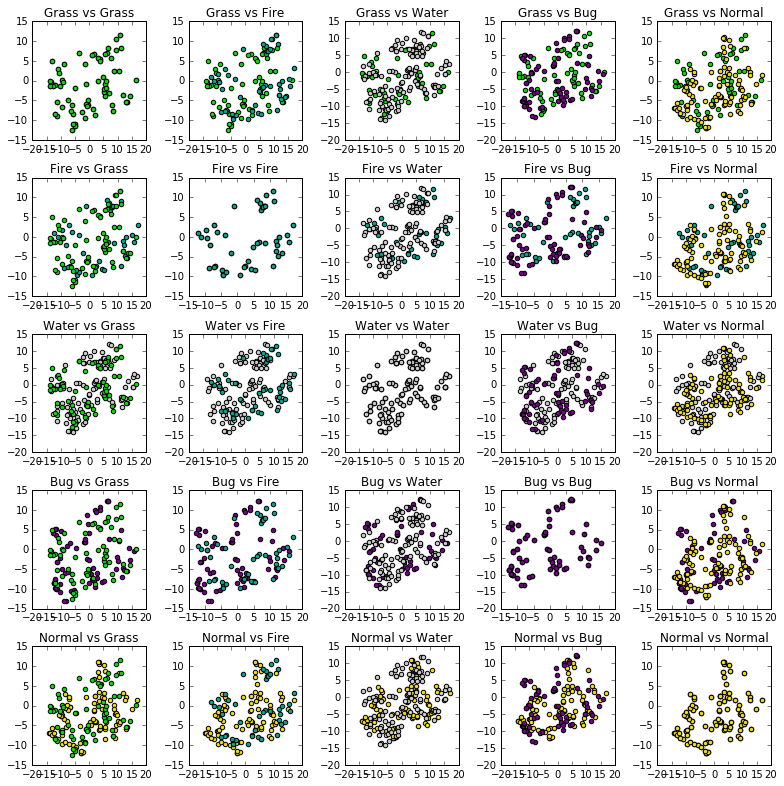

In [12]:
fig = figure(figsize=(11, 11))

cmap = plt.get_cmap('nipy_spectral')
types1 = df['Type 1'].unique()
type1_ids = df['Type1Id'].unique()
num_types1 = len(types1)

rows, cols = 5, 5
num = 1
for row, t1_id, t1 in zip(range(rows), type1_ids, types1):
    for col, t2_id, t2 in zip(range(cols), type1_ids, types1):
        subplot(rows,cols,num)
        X_i = X_tsne[np.where(df['Type1Id'] == t1_id)[0]]
        X_j = X_tsne[np.where(df['Type1Id'] == t2_id)[0]]
        scatter(X_i[:, 0], X_i[:, 1], c=cmap(t1_id / num_types1))
        scatter(X_j[:, 0], X_j[:, 1], c=cmap(t2_id / num_types1))
        title(str(t1) + ' vs ' + str(t2))
        num += 1
fig.tight_layout()

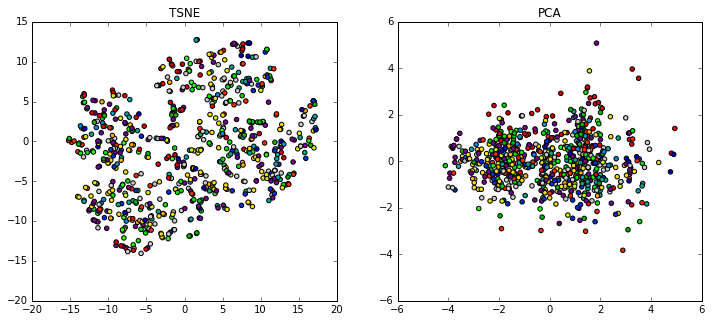

In [13]:
figure(figsize=(12, 5))
cmap = plt.get_cmap('nipy_spectral')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(df['Type1Id'] / num_types1))
title('TSNE')
subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(df['Type1Id'] / num_types1))
title('PCA');

Layout still is not that good in detecting pokemon types. Let's see then, which method better differentiates 'Total', 'HP', 'Attack', 'Defense', 'Special Attack', 'Special Deffense'.

Let's cluster pokemons into 4 components.

In [14]:
from sklearn.cluster import KMeans

num_clusters = 4
features0 = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']
kmeans_tsne = KMeans(n_clusters=num_clusters).fit(X_tsne)
kmeans_pca = KMeans(n_clusters=num_clusters).fit(X_pca)

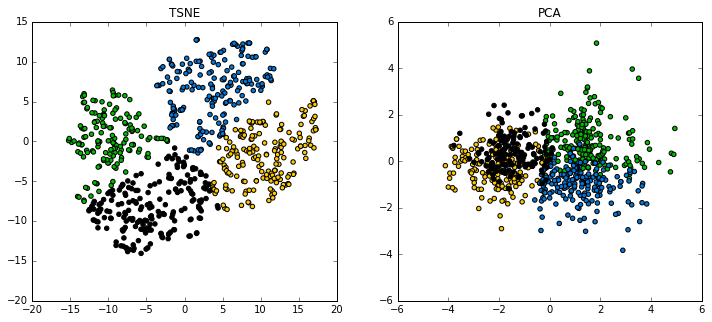

In [15]:
figure(figsize=(12, 5))
cmap = plt.get_cmap('nipy_spectral')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(kmeans_tsne.labels_ / num_clusters))
title('TSNE')
subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(kmeans_pca.labels_ / num_clusters))
title('PCA');

In [16]:
df_norm['tsne_cluster'] = kmeans_tsne.labels_
df_norm['pca_cluster'] = kmeans_pca.labels_
df_tsne_mean = df_norm.groupby('tsne_cluster').mean()
df_pca_mean = df_norm.groupby('pca_cluster').mean()

Beneath there are mean values of different pokemon stats for each cluster.

Both Tsne and Pca distinguish simular pokemon clusters: two high stats pokemons and two low stats pokemons:
    1. Pokemons with good overall stats and especially high defense and HP.
    2. Pokemons with good overall stats and especially high Total and Special Attack.
    3. Pokemons with bad overall stats and especially low Total and Special Attack.
    4. Pokemons with very bad overall stats and especially low Total and Attack.

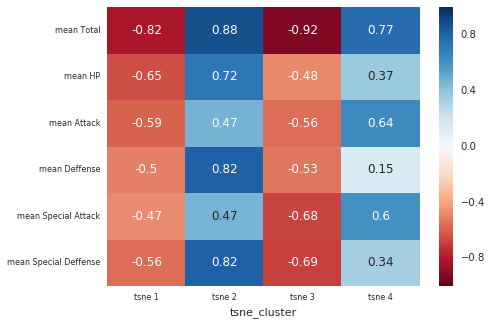

In [17]:
import seaborn as sns

figure(figsize=(7, 5))
ax = sns.heatmap(df_tsne_mean[features0].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['tsne ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=8);
ax.set_yticklabels(['mean Total', 'mean HP', 'mean Attack', 'mean Deffense', 'mean Special Attack',
                    'mean Special Deffense'][::-1], rotation=0, fontsize=8);

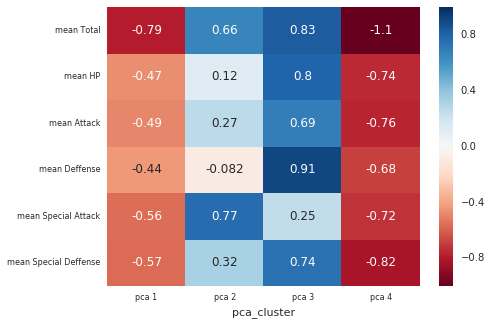

In [18]:

figure(figsize=(7, 5))
ax = sns.heatmap(df_pca_mean[features0].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['pca ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=8);
ax.set_yticklabels(['mean Total', 'mean HP', 'mean Attack', 'mean Deffense', 'mean Special Attack',
                    'mean Special Deffense'][::-1], rotation=0, fontsize=8);